In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
T = 5000
dt = 0.01
s = 10
rho = 28
b = 8/3
eps = 1.
q = 0.5  # noise

In [4]:
X1 = np.empty((T,3))
X1[0,:] = 1.0

for t in range(1,T):
    X1[t,0] = X1[t-1,0] + dt * s * (X1[t-1,1] - X1[t-1,0]) 
    X1[t,1] = X1[t-1,1] + dt * (X1[t-1,0]*(rho - X1[t-1,2]) - X1[t-1,1])
    X1[t,2] = X1[t-1,2] + dt * (X1[t-1,0]*X1[t-1,1] - b*X1[t-1,2])
    
    # Noise
    X1[t,:] += np.sqrt(q * X1[t,0]**2. )* np.random.normal(0,1,3)*np.sqrt(dt)

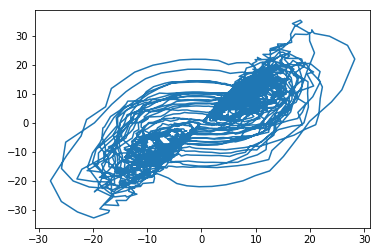

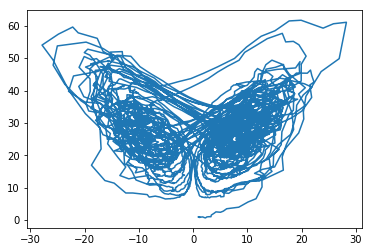

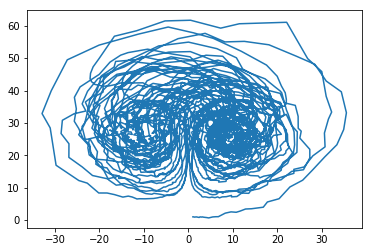

In [5]:
plt.plot(X1[:,0], X1[:,1])
plt.show()
plt.plot(X1[:,0], X1[:,2])
plt.show()
plt.plot(X1[:,1], X1[:,2])
plt.show()

In [6]:
X2 = np.empty((T,3))
X2[0,:] = 10.0

for t in range(1,T):
    X2[t,0] = X2[t-1,0] + dt * ( s * (X2[t-1,1] - X2[t-1,0]) - eps*(X1[t-1,0] - X2[t-1,0]))
    X2[t,1] = X2[t-1,1] + dt * (X2[t-1,0]*(rho - X2[t-1,2]) - X2[t-1,1])
    X2[t,2] = X2[t-1,2] + dt * (X2[t-1,0]*X2[t-1,1] - b*X2[t-1,2])
    
    # Noise
    X2[t,:] += np.sqrt(q * X2[t,0]**2.)* np.random.normal(0,1,3)*np.sqrt(dt)

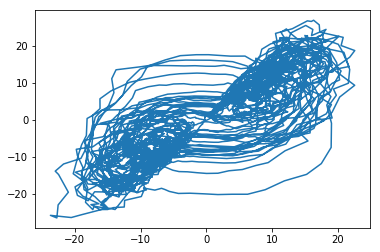

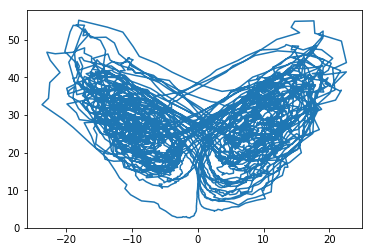

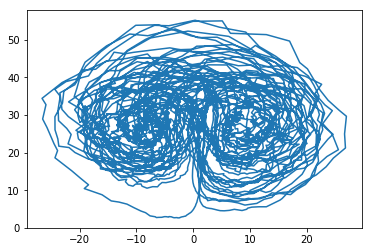

In [7]:
plt.plot(X2[:,0], X2[:,1])
plt.show()
plt.plot(X2[:,0], X2[:,2])
plt.show()
plt.plot(X2[:,1], X2[:,2])
plt.show()

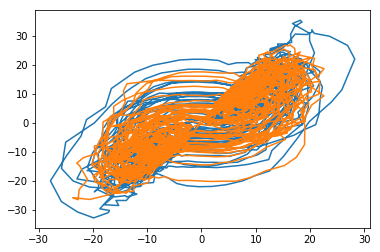

In [8]:
plt.plot(X1[:,0], X1[:,1])

plt.plot(X2[:,0], X2[:,1])
plt.show()

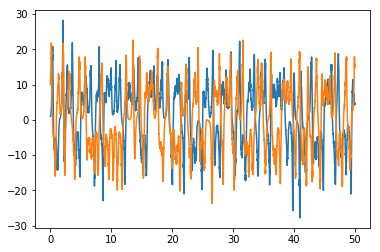

In [9]:
plt.plot(np.arange(T)*dt, X1[:,0])
plt.plot(np.arange(T)*dt, X2[:,0])
plt.show()

In [10]:
Data = np.empty((T,6))
Data[:,:3] = X1
Data[:, 3:] = X2
print(Data)


[[ 1.          1.          1.         10.         10.         10.        ]
 [ 0.98601352  1.14093711  0.99936142 10.41492597 12.80713289 11.97056839]
 [ 0.94088278  1.31290629  0.91838547 11.68694255 13.62235318 12.94835751]
 ...
 [ 4.72992099  5.58930416 21.56325803 14.67043219  9.90375275 36.68377101]
 [ 4.24094036  5.77930769 21.0070449  15.84131307  9.12357762 36.34170889]
 [ 4.46166117  6.31901706 20.97180143 15.81504541  8.6855349  37.77629101]]


In [11]:
np.save("CoupledLorenz_dt"+str(dt),
       Data)

In [12]:
Loading = np.load("CoupledLorenz_dt0.01.npy")

In [13]:
Loading[:,1] == X1[:,1]

array([ True,  True,  True, ...,  True,  True,  True])